# Examples on how to use the new depth estimation functions

We now have two methods, the Matrix Profile and the Segmented Rolling Gradient method.

Initialise notebook

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import pprint

#====================================================================
# Import the main functions from the eadumatrixprofile_core.py module
#====================================================================

from eadumatrixprofile_core import (
    get_setitec_signals,
    depth_est_matrixprofile, 
    depth_est_xls_matrixprofile,
    depth_est_persegment_stats,
    depth_est_xls_persegment_stats,
    )

# Depth Estimation using Matrix Profile
## Processing signals provided as arrays
A function is provided with torque and position array as input. 
* Returned value can be varied by the `simple_results` flag. 
* When `simple_results == True`, the function returns total borehole depth as a single float.

In [2]:
# Absolute path that needs to be adjusted to the user's directory
root_dir = r"C:\Users\NG9374C\Documents\ACSE_Airbus-EADU_data_analytics\scripts\windo\hamburg\HAM_SETITEC\RAW"
# Each dataset is in a folder with the name of the dataset
dataset = r"Dec22"
# The filename is the name of the file with the signals
filename = r"20110019_20110019_ST_490_3.xls"
file_path = Path(root_dir) / dataset / filename

# Get signals from source file
pos, torque = get_setitec_signals(file_path)

# Perform the depth estimation using the matrix profile
# default_templates : Flag to use the default template (from Hamburg Dec22 dataset)
total_borehole_depth_float = depth_est_matrixprofile(torque, pos, simple_results=True)

pprint.pp(f"Estimated depth: {total_borehole_depth_float:.2f} mm")

'Estimated depth: 21.42 mm'


Setting `simple_results == False` means that the function will return a dictionary with the following keys:
- `depth_estimate` (float): The estimated depth value
- `depth_estimate_rag` (int): The ordinal ranking of the estimated depth value
- `depth_estimate_quality` (float): The quality metric of the estimated depth value for the full borehole depth
- `cfrp_depth_estimate` (float): The estimated depth value for CFRP material
- `cfrp_depth_estimate_rag` (int): The ordinal ranking of the estimated depth value for CFRP material
- `cfrp_depth_estimate_quality` (float): The quality metric of the estimated depth value for CFRP material
- `ti_depth_estimate` (float): The estimated depth value for TI material
- `ti_depth_estimate_rag` (int): The ordinal ranking of the estimated depth value for Ti material
- `ti_depth_estimate_quality` (float): The quality metric of the estimated depth value for Ti material
- `estimated_positions` (list): A list of the key positions used to calculate the depths

In [3]:
root_dir = r"C:\Users\NG9374C\Documents\ACSE_Airbus-EADU_data_analytics\scripts\windo\hamburg\HAM_SETITEC\RAW"
dataset = r"Dec22"
filename = r"20110019_20110019_ST_490_3.xls"
file_path = Path(root_dir) / dataset / filename

# Perform the depth estimation using the matrix profile
# default_templates : Flag to use the default template (from Hamburg Dec22 dataset)
full_stack_info_dict = depth_est_matrixprofile(torque, pos, default_templates=True, simple_results=False)

print("Results of the matrix profile depth estimation algorithm:")
pprint.pp(full_stack_info_dict)

Results of the matrix profile depth estimation algorithm:
{'depth_estimate': 21.419,
 'depth_estimate_rag': 'green',
 'depth_estimate_quality': 0.5244971382814078,
 'cfrp_depth_estimate': 9.548,
 'cfrp_depth_estimate_rag': 'green',
 'cfrp_depth_estimate_quality': 0.17190404648337831,
 'ti_depth_estimate': 11.871,
 'ti_depth_estimate_rag': 'green',
 'ti_depth_estimate_quality': 0.5244971382814078,
 'estimated_positions': [4.573, 14.121, 25.992]}


## Processing files

A simple function is provided taking an XLS file path as input and returns a dictionary. The dictionary includes the filename.

Results of the matrix profile depth estimation algorithm:
21.419


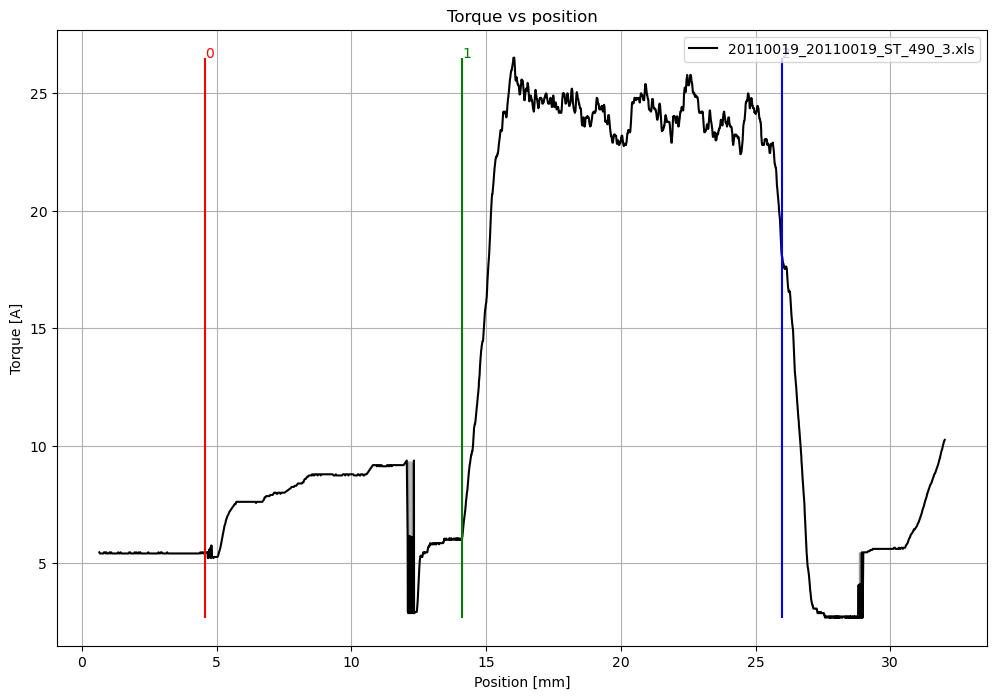

In [4]:
root_dir = r"C:\Users\NG9374C\Documents\ACSE_Airbus-EADU_data_analytics\scripts\windo\hamburg\HAM_SETITEC\RAW"
dataset = r"Dec22"
filename = r"20110019_20110019_ST_490_3.xls"
file_path = Path(root_dir) / dataset / filename

# Perform the depth estimation using the matrix profile
# default_templates : Flag to use the default template (from Hamburg Dec22 dataset)
result = depth_est_xls_matrixprofile(file_path)

print("Results of the matrix profile depth estimation algorithm:")
pprint.pp(result)

# Get signals from source file
pos, torque = get_setitec_signals(file_path)

# Perform the depth estimation using the matrix profile
# default_templates : Flag to use the default template (from Hamburg Dec22 dataset)
full_stack_info_dict = depth_est_matrixprofile(torque, pos, default_templates=True, simple_results=False)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=pos, y=torque, ax=ax, label=filename, color='black')
ax.set_xlabel("Position [mm]")
ax.set_ylabel("Torque [A]")
ax.set_title("Torque vs position")
ax.ylim = (0, 1.1*max(torque))
ax.grid(True)

colorlist = ['red','green','blue','orange','purple','brown','pink','gray','olive','cyan']
ax.vlines(full_stack_info_dict["estimated_positions"], ymin=min(torque), ymax=max(torque), colors=colorlist, label="Key positions")
for i, pos in enumerate(full_stack_info_dict["estimated_positions"]):
    color = colorlist[i]
    ax.text(pos, max(torque), f"{i}", color=color)

The previous example shows a result where the estimation quality is predicted to be good. The next example shows the result when the depth estimate quality is predicted to be low.

Results of the matrix profile depth estimation algorithm:
10.053999


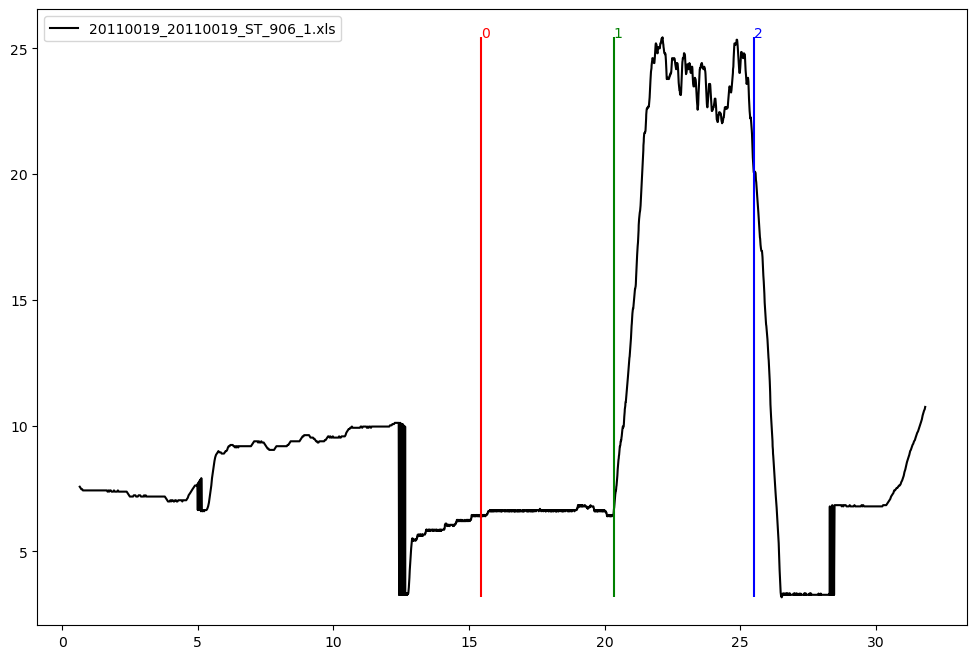

In [5]:
root_dir = r"C:\Users\NG9374C\Documents\ACSE_Airbus-EADU_data_analytics\scripts\windo\hamburg\HAM_SETITEC\RAW"
dataset = r"Jan23"
filename = r"20110019_20110019_ST_906_1.xls"
file_path = Path(root_dir) / dataset / filename

# Perform the depth estimation using the matrix profile
# default_templates : Flag to use the default template (from Hamburg Dec22 dataset)
result = depth_est_xls_matrixprofile(file_path)

print("Results of the matrix profile depth estimation algorithm:")
pprint.pp(result)

# Get signals from source file
pos, torque = get_setitec_signals(file_path)

# Perform the depth estimation using the matrix profile
# default_templates : Flag to use the default template (from Hamburg Dec22 dataset)
full_stack_info_dict = depth_est_matrixprofile(torque, pos, default_templates=True, simple_results=False)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=pos, y=torque, ax=ax, label=filename, color='black')

colorlist = ['red','green','blue','orange','purple','brown','pink','gray','olive','cyan']
ax.vlines(full_stack_info_dict["estimated_positions"], ymin=min(torque), ymax=max(torque), colors=colorlist, label="Key positions")
for i, pos in enumerate(full_stack_info_dict["estimated_positions"]):
    color = colorlist[i]
    ax.text(pos, max(torque), f"{i}", color=color)

## Processing an entire directory of files

In [6]:
# Define the directory and filename of the target file
root_dir = r"C:\Users\NG9374C\Documents\ACSE_Airbus-EADU_data_analytics\scripts\windo\hamburg\HAM_SETITEC\RAW"
# Specify the datasets
datasets = ["Dec22", "Jan23"]
# Select the hole filename
filename = "*.xls"
# datasets = ["Jan23"]
result_list = []

for dataset in datasets:
    # Full path to target file
    target_directory = Path(root_dir) / dataset
    target_files_to_open = list(target_directory.glob(filename))
    for target_file_to_open in target_files_to_open:
        result = depth_est_xls_matrixprofile(target_file_to_open, simple_results=False)
        result['dataset'] = dataset
        result_list.append(result)

# Convert the result list to a dataframe
result_df = pd.DataFrame(result_list)
# Extract the cycle counter from the filename
result_df['counter'] = result_df.apply(lambda x: int(x['filename'].split('.')[0].split('_')[-1]), axis=1)
result_df.sort_values(by=['dataset', 'counter'], inplace=True)
# Extract the rank of the hole from the counter
result_df['rank'] = result_df.groupby('dataset')['counter'].transform(lambda x: x.astype('category').cat.codes + 1)

result_df.head(3)

,depth_estimate,depth_estimate_rag,depth_estimate_quality,cfrp_depth_estimate,cfrp_depth_estimate_rag,cfrp_depth_estimate_quality,ti_depth_estimate,ti_depth_estimate_rag,ti_depth_estimate_quality,estimated_positions,filename,dataset,counter,rank
0,21.062000,green,0.000000,15.862000,green,0.000000,5.199999,green,0.000000,"[4.592, 20.454, 25.654]",20110019_20110019_ST_489_2.xls,Dec22,2,1
1,21.419001,green,0.524497,9.548000,green,0.171904,11.871000,green,0.524497,"[4.573, 14.121, 25.992]",20110019_20110019_ST_490_3.xls,Dec22,3,2
2,17.607000,green,0.041084,9.610001,green,0.357943,7.997000,green,0.357943,"[4.508, 14.118, 22.115]",20110019_20110019_ST_491_4.xls,Dec22,4,3


## Visualise the RAG

* One true positive: an inaccurate estimation correctly identified as **'red'**
    * This is shown as `20110019_20110019_ST_906_1.xls`
* One false positive: an accurate depth estimation incorrectly identified as **'red'** 
    * This is shown as `20110019_20110019_ST_934_29.xls`

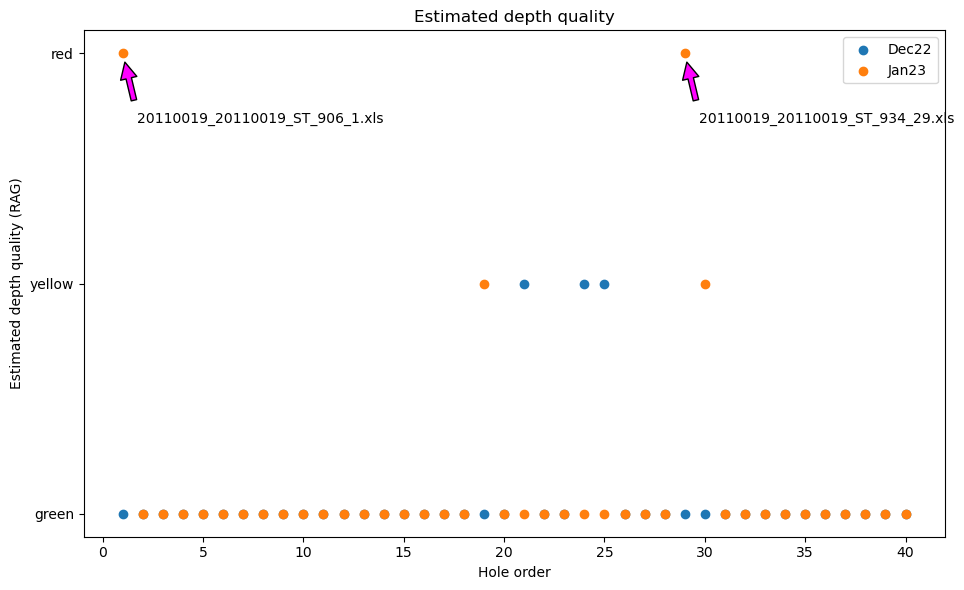

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
target_datasets = result_df['dataset'].unique()
for target_dataset in target_datasets:
    df = result_df.query(f"dataset == '{target_dataset}'")
    ax.scatter(df['rank'], df['depth_estimate_rag'], label=f'{target_dataset}')
for idx in result_df.query("depth_estimate_rag == 'red'").index:
    xy=(result_df.loc[idx, 'rank'], result_df.loc[idx, 'depth_estimate_rag'])
    ax.annotate(result_df.loc[idx, 'filename'], xy=xy, xytext=(10, -50), textcoords='offset points', arrowprops=dict(facecolor='magenta', shrink=0.15))
ax.legend()
ax.set(xlabel='Hole order', ylabel='Estimated depth quality (RAG)', title='Estimated depth quality')
fig.tight_layout()

# Do cumulative depth by material

Calculate the cumulative depth, but ignore the estimates marked as **'red'**.

In [8]:
target_datasets = result_df['dataset'].unique()
cm_df = []
for i, target_dataset in enumerate(target_datasets):
    accurate_df = result_df.query(f"dataset == '{target_dataset}' & depth_estimate_rag != 'red'")[['filename', 'counter', 'rank', 'depth_estimate', 'cfrp_depth_estimate', 'ti_depth_estimate']]
    sumdf = accurate_df[['depth_estimate', 'cfrp_depth_estimate', 'ti_depth_estimate']].cumsum()
    sumdf['dataset'] = target_dataset
    sumdf['rank'] = accurate_df['rank']
    sumdf['counter'] = accurate_df['counter']
    sumdf['filename'] = accurate_df['filename']
    cm_df.append(sumdf)

cm_df = pd.concat(cm_df)

Visualise in a scatter plot. Ignored estimates can be seen as gaps in the scatter plot. 

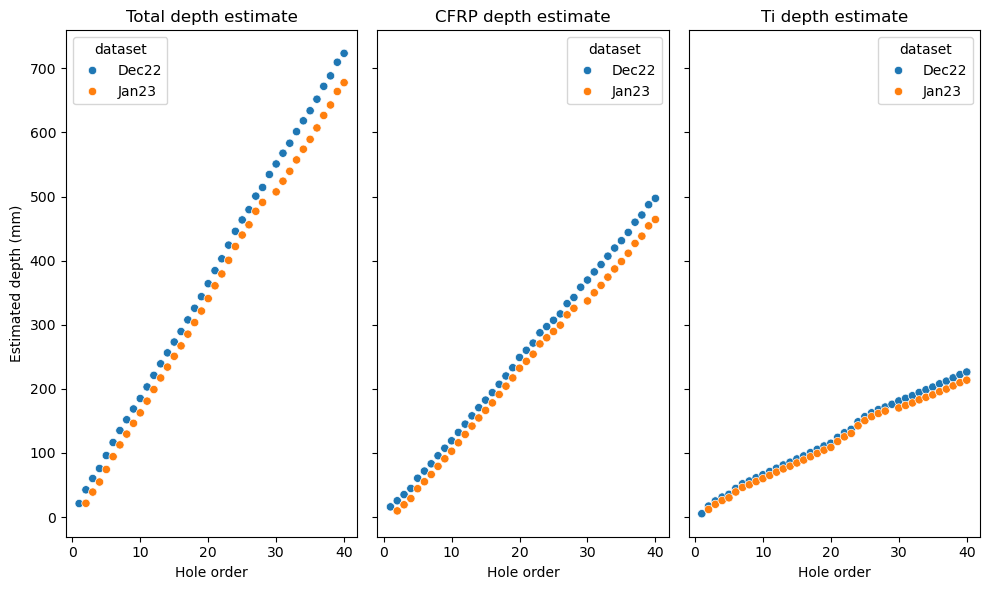

In [9]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 6))
sns.scatterplot(data=cm_df, x='rank', y='depth_estimate', hue='dataset', ax=ax[0])
ax[0].set(title= 'Total depth estimate', xlabel='Hole order', ylabel='Estimated depth (mm)')
sns.scatterplot(data=cm_df, x='rank', y='cfrp_depth_estimate', hue='dataset', ax=ax[1])
ax[1].set(title= 'CFRP depth estimate', xlabel='Hole order', ylabel='Estimated depth (mm)')
sns.scatterplot(data=cm_df, x='rank', y='ti_depth_estimate', hue='dataset', ax=ax[2])
ax[2].set(title= 'Ti depth estimate', xlabel='Hole order', ylabel='Estimated depth (mm)')
fig.tight_layout()

# Depth Estimation using the Segmented Rolling Gradient method

## Processing signals provided as arrays
A function is provided with torque and position array as input. 
* Returned value can be varied by the `simple_results` flag. 
* When `simple_results == True`, the function returns total borehole depth as a single float.
* When `simple_results == False`, the function returns a dictionary that contains the individual depths of the material, and the reference points of the entry/exit point estimations.

In [10]:
pos, torque = get_setitec_signals(file_path)
depth_est_persegment_stats(torque, pos, simple_results=False, debug=True)

For step 0, window size=23
For step 1, window size=23
For step 2, window size=88
For step 3, window size=23
3
[(0, 5.101, 5.101, 2.725, 1.319), (1, 5.846, 5.759, 7.751, 6.287), (2, 21.446, 21.534, 26.483, 26.46)]
Method 1 (mean-based)   depth CFRP= 15.600 mm
                        depth Ti=   5.037 mm
                        depth total=20.637 mm
Method 2 (median-based) depth CFRP= 15.775 mm
                        depth Ti=   4.926 mm
                        depth total=20.701 mm


{'depth_estimate': 20.701,
 'depth_estimate_rag': None,
 'depth_estimate_quality': None,
 'cfrp_depth_estimate': 15.775001,
 'cfrp_depth_estimate_rag': None,
 'cfrp_depth_estimate_quality': None,
 'ti_depth_estimate': 4.9259987,
 'ti_depth_estimate_rag': None,
 'ti_depth_estimate_quality': None,
 'estimated_positions': [5.759, 21.534, 26.46]}

The below uses the returned dictionary to create a plot

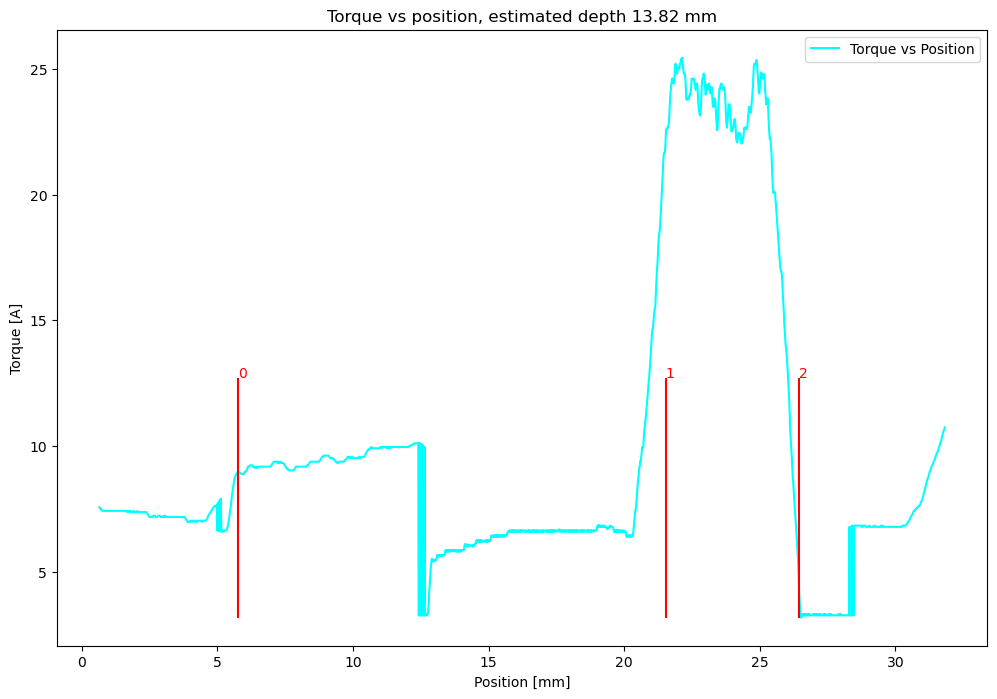

In [11]:
results = depth_est_xls_persegment_stats(file_path, simple_results=False, debug=False)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=pos, y=torque, ax=ax, label='Torque vs Position', color='cyan')
ax.vlines(x=results['estimated_positions'], ymin=torque.min(), ymax=torque.max()*0.5, color='red', label="Key positions")
ax.set_xlabel("Position [mm]")
ax.set_ylabel("Torque [A]")
ax.set_title(f"Torque vs position, estimated depth {result['depth_estimate']:.2f} mm")
for i, pos in enumerate(results['estimated_positions']):
    ax.text(pos, torque.max()*0.5, f"{i}", color='red')

# Comparison of the depth estimation algorithm with the manual measurements

(8.57499981, 12.63899994)

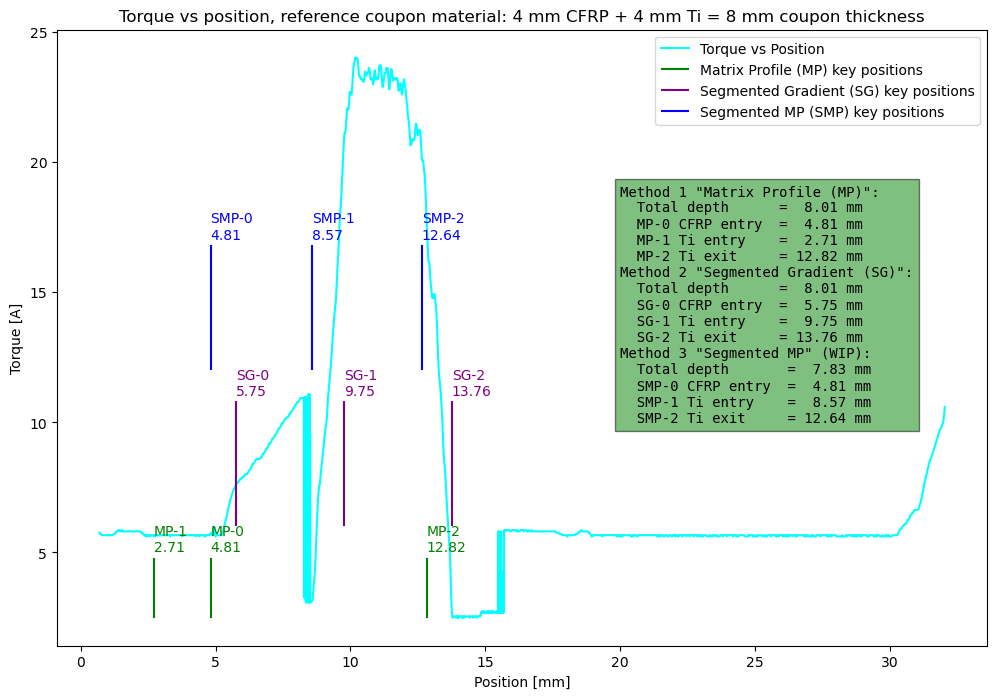

In [12]:
# plt.rcParams["font.family"] = "monospace"

file_demo = r'C:\\Users\\NG9374C\\Documents\\ACSE_Airbus-EADU_data_analytics\\scripts\\windo\\hamburg\\HAM_SETITEC\\RAW\\CouponTests\\demo\\17070143_17070143_ST_1092_1.xls'
results_mp = depth_est_xls_matrixprofile(file_demo, simple_results=False)
results_ss = depth_est_xls_persegment_stats(file_demo, simple_results=False)
results_smp = dict(depth_estimate = 12.64-4.81, estimated_positions= [4.81, 8.57, 12.64])

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
pos, torque = get_setitec_signals(file_demo)
sns.lineplot(x=pos, y=torque, ax=ax, label='Torque vs Position', color='cyan')
ax.vlines(x=results_mp['estimated_positions'], ymin=torque.min(), ymax=torque.max()*0.2, color='green', label="Matrix Profile (MP) key positions")
ax.vlines(x=results_ss['estimated_positions'], ymin=torque.max()*0.25, ymax=torque.max()*0.45, color='purple', label="Segmented Gradient (SG) key positions")
ax.vlines(x=results_smp['estimated_positions'], ymin=torque.max()*0.5, ymax=torque.max()*0.7, color='blue', label="Segmented MP (SMP) key positions")
ax.set_xlabel("Position [mm]")
ax.set_ylabel("Torque [A]")
ax.set_title(f"Torque vs position, reference coupon material: 4 mm CFRP + 4 mm Ti = 8 mm coupon thickness")
for i, pos in enumerate(results_mp['estimated_positions']):
    ax.text(pos, torque.max()*0.21, f"MP-{i}\n{results_mp['estimated_positions'][i]:.2f}", color='green')
for i, pos in enumerate(results_ss['estimated_positions']):
    ax.text(pos, torque.max()*0.46, f"SG-{i}\n{results_ss['estimated_positions'][i]:.2f}", color='purple')
for i, pos in enumerate(results_smp['estimated_positions']):
    ax.text(pos, torque.max()*0.71, f"SMP-{i}\n{results_smp['estimated_positions'][i]:.2f}", color='blue')
ax.legend()
text = \
f"""Method 1 "Matrix Profile (MP)":
  Total depth      =  {results_mp['depth_estimate']:.2f} mm
  MP-0 CFRP entry  =  {results_mp['estimated_positions'][0]:.2f} mm
  MP-1 Ti entry    =  {results_mp['estimated_positions'][1]:.2f} mm
  MP-2 Ti exit     = {results_mp['estimated_positions'][2]:.2f} mm
Method 2 "Segmented Gradient (SG)":
  Total depth      =  {results_ss['depth_estimate']:.2f} mm
  SG-0 CFRP entry  =  {results_ss['estimated_positions'][0]:.2f} mm
  SG-1 Ti entry    =  {results_ss['estimated_positions'][1]:.2f} mm
  SG-2 Ti exit     = {results_ss['estimated_positions'][2]:.2f} mm
Method 3 "Segmented MP" (WIP):
  Total depth       =  {results_smp['depth_estimate']:.2f} mm
  SMP-0 CFRP entry  =  {results_smp['estimated_positions'][0]:.2f} mm
  SMP-1 Ti entry    =  {results_smp['estimated_positions'][1]:.2f} mm
  SMP-2 Ti exit     = {results_smp['estimated_positions'][2]:.2f} mm"""
ax.text(20, 10, text, color='black', bbox=dict(facecolor='green', alpha=0.5), fontdict=dict(size=10, family='monospace'))
7.85300016,
8.57499981, 12.63899994

In [13]:
results_ss

{'depth_estimate': 8.009001,
 'depth_estimate_rag': None,
 'depth_estimate_quality': None,
 'cfrp_depth_estimate': 3.999,
 'cfrp_depth_estimate_rag': None,
 'cfrp_depth_estimate_quality': None,
 'ti_depth_estimate': 4.01,
 'ti_depth_estimate_rag': None,
 'ti_depth_estimate_quality': None,
 'estimated_positions': [5.751, 9.75, 13.76]}

In [14]:
results_mp

{'depth_estimate': 8.009001,
 'depth_estimate_rag': 'green',
 'depth_estimate_quality': 0.35330070997501156,
 'cfrp_depth_estimate': -2.1059997,
 'cfrp_depth_estimate_rag': 'green',
 'cfrp_depth_estimate_quality': 0.13714959325137654,
 'ti_depth_estimate': 10.115,
 'ti_depth_estimate_rag': 'green',
 'ti_depth_estimate_quality': 0.35330070997501156,
 'estimated_positions': [4.812, 2.706, 12.821],
 'filename': '17070143_17070143_ST_1092_1.xls'}